<a href="https://colab.research.google.com/github/Arash444/Foundation-of-Machine-Learning/blob/main/Fall2025_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS224-EE242a - Fall 2025 - Homework 1

# Due: Friday, October 10, 2025 @ 11:59pm

### Maximum points: 100 pts


## Submit your solution to Gradescope:
1. Submit a single PDF to **HW1**
2. Submit your jupyter notebook to **HW1-code**

**See the additional submission instructions at the end of this notebook**


## <font color='green'> Enter your information below: </font>

### <font color='green'> Your Name (submitter): </font> Arash Shahin

### <font color='green'> Your student ID (submitter): </font> 862622048
    
    
<b>By submitting this notebook, I assert that the work below is my own work, completed for this course.  Except where explicitly cited, none of the portions of this notebook are duplicated from anyone else's work or my own previous work.</b>


## Academic Integrity
Each assignment should be done  individually. You may discuss general approaches with other students in the class, and ask questions to the TAs, but  you must only submit work that is yours . If you receive help by any external sources (other than the TA and the instructor), you must properly credit those sources, and if the help is significant, the appropriate grade reduction will be applied. If you fail to do so, the instructor and the TAs are obligated to take the appropriate actions outlined at http://conduct.ucr.edu/policies/academicintegrity.html . Please read carefully the UCR academic integrity policies included in the link.


# Overview
In this assignment, you will refresh your knowledge of basic linear algebra (such as multiplication rules and norms), probability, and the K-Nearest Neighbors classifier.

<font color='red'>Please **do not use pre-defined functions** to solve the questions unless we specify them in the question descriptions. For example, **do not use `numpy.linalg.norm` to solve question 2 in this homework**, instead, you should understand the definition of the norm and be able to implement it with the basic operations.</font>


## Read *all* cells carefully and answer all parts


# Basic NumPy

[NumPy](https://numpy.org/) is a powerful numerical computing Python package.
Below we will summarize some basic linear algebra operations you will need to complete this assignment.

Before using `NumPy`, we need to import it at the very beggining of the script with:

In [ ]:
import numpy as np

To create a vector/matrix, use `np.array()` that takes a python `list` as input and returns a vector/matrix variable that contains the same elements as in the `list`. Here are some examples on how to create vectors/matrices using `np.array`.

In [ ]:
# To create an vector:
vector = [1,2,3]
vector = np.array(vector)
# or
vector = np.array([1,2,3])
print(f'Created vector: {vector}\n')

# To create an 3x4 matrix:
matrix = [[1,2,3, 4],[5,6,7,8],[9,10,11,12]]
matrix = np.array(matrix)
# or
matrix = np.array([[1,2,3, 4],[5,6,7,8],[9,10,11,12]])
print(f'Created matrix:\n{matrix}')

Created vector: [1 2 3]

Created matrix:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


To check the shape of `np.array` variables you created, use attribute `.shape`, so that you know you create the right vector/matrix you want.

In [ ]:
print(f'Shape of vector: {vector.shape}')
print(f'Shape of matrix: {matrix.shape}')

Shape of vector: (3,)
Shape of matrix: (3, 4)


To obtain the transpose of `np.array`, use attribute `.T`.

In [ ]:
print(f'Transposed matrix:\n{matrix.T}')

Transposed matrix:
[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]


To compute element-wise product between two matrices, use `*`. <br>
To compute matrix multiplication between two matrices, use `@`.

In [ ]:
print(f'Element-wise product:\n{matrix * matrix}')
print(f'Matrix product:\n{matrix @ matrix.T}')

Element-wise product:
[[  1   4   9  16]
 [ 25  36  49  64]
 [ 81 100 121 144]]
Matrix product:
[[ 30  70 110]
 [ 70 174 278]
 [110 278 446]]


To sum all the element of a vector, call `.sum()`

In [ ]:
print(f'Summation of vector elements: {vector.sum()}')

Summation of vector elements: 6


For a matrix, we can perform summation along different dimensions using `axis` parameter. \
For example, summation along `axis=0` will give a row vector that is the sum of all the rows. In other words, first entry will be the summation of entries in the first column, second entry will be the summation of entries in the second column, and so on.

In [ ]:
print(f'Summation of all the rows: {matrix.sum(axis=0)}')
print(f'Summation of all the columns: {matrix.sum(axis=1)}')
print(f'Summation of all the elements: {matrix.sum()}')

Summation of all the rows: [15 18 21 24]
Summation of all the columns: [10 26 42]
Summation of all the elements: 78


For more information on using NumPy, please refer to the [official documentation](https://numpy.org/doc/stable/). <br>
Enjoy!

# Basic Linear Algebra [25 pts]

## Question 1. Vector-matrix arithmetic [11 pts]

#### Question 1a: Element-wise product [2 pts]  
The elementwise product of two matrices is called the Hadamard product and denoted as $\odot$ (called `odot` notation). Suppose we are given two $m\times n$ matrices as
$$
\mathbf{A} =
\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n} \\
a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \dots & a_{mn} \\
\end{bmatrix},\
\mathbf{B} =
\begin{bmatrix}
b_{11} & b_{12} & \dots & b_{1n} \\
b_{21} & b_{22} & \dots & b_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
b_{m1} & b_{m2} & \dots & b_{mn} \\
\end{bmatrix}
$$

We can compute the Hadamard product of $\mathbf{A},\mathbf{B}$ as
$$
\mathbf{A} \odot \mathbf{B} =
\begin{bmatrix}
a_{11}b_{11} & a_{12}b_{12} & \dots & a_{1n}b_{1n} \\
a_{21}b_{21} & a_{22}b_{22} & \dots & a_{2n}b_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1}b_{m1} & a_{m2}b_{m2} & \dots & a_{mn}b_{mn} \\
\end{bmatrix}
$$

Create two matrices using `numpy.array` as
$\mathbf{A} = \begin{bmatrix}
5 & 0 & 7 \\
6 & 1 & 3 \\
5 & 9 & 3 \\
\end{bmatrix}$
and
$\mathbf{B} = \begin{bmatrix}
1 & 0 & 2 \\
0 & 2 & 1 \\
1 & 1 & 2 \\
\end{bmatrix}$
and compute $\mathbf{A} \odot \mathbf{B}$.

**To create matrices A and B, use the digits from your student ID, but replace all odd numbers with -3.**

In [ ]:
# Complete the code blocks below

A = np.array([[8, 6, 2],[6, 2, 2],[0, 4 ,8]])
B = np.array([[8, 6, 2],[6, 2, 2],[0, 4 ,8]])

#A = np.array([[5, 0, 7],[6, 1, 3],[5, 9, 3]])
#B = np.array([[1, 0, 2],[0, 2, 1],[1, 1, 2]])

# print the product
product = A * B
print(product)

[[64 36  4]
 [36  4  4]
 [ 0 16 64]]



#### Question 1b: Scalar or dot product [2 pts]  

Scalar, dot, or inner product of two vectors $\mathbf{x},\mathbf{y}\in\mathbb{R}^d$ can be defined as the summation of the element-wise product of all the entries in two vectors:

$$\mathbf{x}^\top\mathbf{y} = \langle\mathbf{x}, \mathbf{y}\rangle =  \sum_{i=1}^dx_iy_i.$$


You are given partial observations of two vectors, $\mathbf{x}$ and $\mathbf{y}$, where $\mathbf{x} = \begin{bmatrix}6 \\ \mathbf{?} \\ 9\end{bmatrix}$ and $\mathbf{y} = \begin{bmatrix}\mathbf{?} \\ 3 \\ 7\end{bmatrix}$.

**Find the unknown values in $\mathbf{x}$ and $\mathbf{y}$ if their dot product $\mathbf{x}^\top \mathbf{y} = \dfrac{1}{3}$. Then, show in code that the values you found satisfy $\mathbf{x}^\top \mathbf{y} = \dfrac{1}{3}$.**

**Provide a brief explanation on how you found the missing (?) values.**



In [ ]:
# Complete the code blocks below and add a brief explanation

# Provide a brief explanation on how you found the missing (?) values.
# We'll sum up the two vectors according to the algorithm stated. The unkown value in X will be regarded as a and for Y, b.
# 6*b + 3*a + 9*7 = 6b + 3a + 63 = 1/3 -> 18b + 9a + 189 = 1 -> 18b + 9a = -188
# The solution to our equation is a line, meaning we have an infinite number of solutions
# We'll pick b = -94/9 and a = 0 as a possible solution
x = np.array([6,0,9])
y = np.array([-94/9,3,7])

# print product
product = x * y
dot = product.sum()
print(dot)

0.3333333333333286


#### Question 1c: Matrix–vector products [2 pts] <br>
Now that we know how to calculate dot products, we can begin to understand the product between an matrix $\mathbf{A}$ and an $n$-dimensional vector $\mathbf{x}$. To start off, we view our matrix in terms of its row vectors:
$$
\mathbf{A} =
\begin{bmatrix}
\mathbf{a}_{1}^\top\\
\mathbf{a}_{2}^\top\\
\vdots\\
\mathbf{a}_{m}^\top\\
\end{bmatrix},
$$<br>
where each $\mathbf{a}_{i}^\top\in\mathbb{R}^n$ is a row vector representing the $i^{\textrm{th}}$ row of the matrix $\mathbf{A}$.<br>
The matrix–vector product $\mathbf{Ax}$ is simply a column vector of length $m$, whose $i^{\textrm{th}}$ element is the dot product $\mathbf{a}_{i}^\top\mathbf{x}$:
$$
\mathbf{Ax} =
\begin{bmatrix}
\mathbf{a}_{1}^\top\mathbf{x}\\
\mathbf{a}_{2}^\top\mathbf{x}\\
\vdots\\
\mathbf{a}_{m}^\top\mathbf{x}\\
\end{bmatrix}.
$$<br>

**Compute the $\mathbf{Ax}$. Use values of $\mathbf{A}$ and $\mathbf{x}$ from Q1a and Q1b.**

In [ ]:
# Complete the code blocks below

product = A @ x

# print product

print(product)

[66 54 72]


#### Question 1d: Matrix–matrix multiplication [2 pts] <br>
Suppose we have two matrix $\mathbf{A}$ and $\mathbf{B}$ that can be viewed as "vector of vectors", the same described as question Q1c:
$$
\mathbf{A} =
\begin{bmatrix}
\mathbf{a}_{1}^\top\\
\mathbf{a}_{2}^\top\\
\vdots\\
\mathbf{a}_{m}^\top\\
\end{bmatrix},\quad
\mathbf{B} =
\begin{bmatrix}
\mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{n}
\end{bmatrix}.
$$<br>
To compute the matrix product $\mathbf{C}\in\mathbb{R}^{m\times n}$, we simply compute each element $c_{ij}$ as the dot product between the $i^{\textrm{th}}$ row of $\mathbf{A}$ and the $j^{\textrm{th}}$ column of $\mathbf{B}$, $\textrm{i.e.},\mathbf{a}_{i}^\top\mathbf{b}_{j}$:
$$
\mathbf{AB} =
\begin{bmatrix}
\mathbf{a}_{1}^\top\mathbf{b}_{1} & \mathbf{a}_{1}^\top\mathbf{b}_{2} & \dots & \mathbf{a}_{1}^\top\mathbf{b}_{n}\\
\mathbf{a}_{2}^\top\mathbf{b}_{1} & \mathbf{a}_{2}^\top\mathbf{b}_{2} & \dots & \mathbf{a}_{2}^\top\mathbf{b}_{n}\\
\vdots & \vdots & \ddots & \vdots\\
\mathbf{a}_{m}^\top\mathbf{b}_{1} & \mathbf{a}_{m}^\top\mathbf{b}_{2} & \dots & \mathbf{a}_{m}^\top\mathbf{b}_{n}\\
\end{bmatrix}.
$$<br>

**Compute $\mathbf{AB}$. Use the digits from your student ID to create $\mathbf{A}$ and $\mathbf{B}$, but replace all odd numbers with -3.**

In [ ]:
# Complete the code blocks below

A = np.array([[8, 6, 2],[6, 2, 2],[0, 4 ,8]])
B = np.array([[8, 6, 2],[6, 2, 2],[0, 4 ,8]])

product = A @ B
# print Product
print(product)

[[100  68  44]
 [ 60  48  32]
 [ 24  40  72]]


#### Question 1e: Hadamard and dot product validity [3 pts]

Suppose we are given two vectors
$$x = \begin{bmatrix} 1 \\ 3 \\ 5\end{bmatrix},\ y =  \begin{bmatrix} 2 \\ 4\\ 6 \\ 8 \end{bmatrix}$$


**1. Can you compute the Hadamard product $x \odot y$? If yes, complete the code block below. If not, explain why in the text.**

In [ ]:
# They do not have the same dimensions as is required by the hadmard product. x is 3×1 and y is 4×1 therefore we cannot do a Hadmard product


**2. Can you compute the dot (inner) product $x^\top y$? If yes, complete the code block below. If not, explain why in the text.**

In [ ]:
# In order to do the dot product, the inner dimensions need to match. xT's dimension's 1×3 and y's is 4×1. 3!=4 and therefore we cannot compute it.


**3. Can you compute matrix product $xy^\top$? If yes, complete the code block below. If not, explain why in the text.**

In [ ]:
x = np.array([1,3,5]).reshape(-1, 1)
y = np.array([2,4,6,8]).reshape(-1, 1)

product = x @ y.T

print(product)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]]


## Question 2. Norm, mean, distance and similarity [14 pts]

For this question, we will be working with [Planets Dataset](https://exoplanets.nasa.gov/exoplanet-catalog/) from [Seaborn](https://seaborn.pydata.org/index.html). The Planets dataset includes information about exoplanets, such as mass, orbital period, and year of discovery. In this problem, we will focus on the following attributes:

*  **mass**: The mass of the exoplanet, measured in terms of Jupiter masses.
*  **number**: The number of planets in the system.
*  **orbital_period**: The orbital period in Earth days.
*  **distance**: The distance from Earth in light-years.

Using the `load_dataset` API, we can load these attributes into a `features` array. The array will have four columns, each representing `mass`, `number`, `orbital_period`, and `distance`, respectively. Each row represents a different exoplanet.


In [ ]:
import seaborn
import numpy as np

# Use the load_dataset API to load `planets` dataset.
# Load the following attributes: 'mass', 'number', 'orbital_period', 'distance'
planets_dataset = seaborn.load_dataset('planets')
features_df = planets_dataset[['mass', 'number', 'orbital_period', 'distance']].dropna()
features = features_df.to_numpy()

print("Planets Dataset\n", features_df)

Planets Dataset
        mass  number  orbital_period  distance
0     7.100       1       269.30000     77.40
1     2.210       1       874.77400     56.95
2     2.600       1       763.00000     19.84
3    19.400       1       326.03000    110.62
4    10.500       1       516.22000    119.47
..      ...     ...             ...       ...
640   2.100       1       111.70000     14.90
641   1.068       1         5.05050     44.46
642   1.940       1       311.28800     17.24
649   1.470       1         2.70339    178.00
784   0.947       3       580.00000    135.00

[498 rows x 4 columns]


#### Question 2a: Norm of vector [3 pts]  


<!-- ![norm](https://miro.medium.com/v2/resize:fit:480/1*ZreluxyiXJnjWNcEZ_HHSQ.png) -->

The $\ell_1$ norm sums the absolute values of a vector’s elements:
$$
\|\mathbf{x}\|_1 = \sum_{i=1}^n|x_i|,
$$
The $\ell_2$ norm is also common and the associated measure is called the Euclidean distance. By definition, the $\ell_2$ norm is the square root of summation of the square values of a vector’s elements:
$$
\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2},
$$
Both $\ell_1$ and $\ell_2$ norms can be represented in the more general $\ell_p$ norms:
$$
\|\mathbf{x}\|_p = \left(\sum_{i=1}^n|x_i|^p\right)^{1/p},
$$


**Select any two exoplanets from the features array above and create two vectors, $\mathbf{x}$ and $\mathbf{y}$. Each vector will contain four entries, one for each attribute. Then, compute the $\ell_1$ and $\ell_2$ norms for both $\mathbf{x}$ and $\mathbf{y}$.**


<font color='red'>(You **are not** allowed to use `numpy.linalg.norm`)</font>

In [ ]:
# Complete the code blocks below

x = features[0]
y = features[1]
print(f"Vector x (Planet 1): {x}")
print(f"Vector y (Planet 2): {y}\n")

l1_x = sum(abs(xi) for xi in x)
l2_x = sum(xi**2 for xi in x)**0.5
print(f'l1 norm of x: {l1_x}, l2 norm of x: {l2_x}')

l1_y = sum(abs(yi) for yi in y)
l2_y = sum(yi**2 for yi in y)**0.5
print(f'l1 norm of y: {l1_y}, l2 norm of y: {l2_y}')

Vector x (Planet 1): [  7.1   1.  269.3  77.4]
Vector y (Planet 2): [  2.21    1.    874.774  56.95 ]

l1 norm of x: 354.80000000000007, l2 norm of x: 280.2938814886975
l1 norm of y: 934.9340000000001, l2 norm of y: 876.6291905224238


#### Question 2b: Vector mean [3 pts]  

We are often interested in the average value of the features in our dataset, such as the average mass of all exoplanets.

(You **are** allowed to use `numpy.mean` to solve this question).

**1. Compute the average `mass` and the average `orbital_period` of all exoplanets in the dataset.**

In [ ]:
# Complete the code blocks below

average_mass = np.mean(features[:, 0])

average_orbital_period = np.mean(features[:, 2])

print(f"1. Average mass of all exoplanets: {average_mass:.2f} Jupiter masses")
print(f"   Average orbital period of all exoplanets: {average_orbital_period:.2f} Earth days\n")

1. Average mass of all exoplanets: 2.51 Jupiter masses
   Average orbital period of all exoplanets: 835.78 Earth days



**2. Pick any exoplanet and compute the mean value of all four features.**

In [ ]:
# Complete the code blocks below

exoplanet_sample = features[0]
feature_avg = np.mean(exoplanet_sample)

print(f"2. Features for the first exoplanet: {exoplanet_sample}")
print(f"   Mean value of its features: {feature_avg:.2f}")


2. Features for the first exoplanet: [  7.1   1.  269.3  77.4]
   Mean value of its features: 88.70


#### Question 2c: Distance between vectors [3 pts]  


The $\ell_p$ distance between two vectors $\mathbf{x}_i, \mathbf{x}_j \in \mathbb{R}^n$ can be written as  
$$\|\mathbf{x}_i - \mathbf{x}_j\|_p = \left(\sum_{k=1}^n |\mathbf{x}_i(k) - \mathbf{x}_j(k)|^p\right)^{1/p}, $$
which is the $\ell_p$ norm of vector $\mathbf{x}_i- \mathbf{x}_j$.

**Pick any two exoplanets $\mathbf{x}$ and $\mathbf{y}$ from the `features` array above (feel free to use the same vectors from the previous question). Then, compute the $\ell_2$ and $\ell_3$ distance between vectors $\mathbf{x}$ and $\mathbf{y}$.**

In [ ]:
# Complete the code blocks below

x = features[4]
y = features[8]
print(f"Vector x: {x}")
print(f"Vector y: {y}\n")

l2_xy = sum((xi-yi)**2 for xi, yi in zip(x, y))**0.5
l3_xy =sum((abs(xi-yi))**3 for xi, yi in zip(x, y))**(1/3)
print(f'l2 distance between x y: {l2_xy}')
print(f'l3 distance between x y: {l3_xy}')

Vector x: [ 10.5    1.   516.22 119.47]
Vector y: [  1.99   2.   452.8   74.79]

l2 distance between x y: 78.05010506078771
l3 distance between x y: 70.12856915238706


#### Question 2d: Similarity between vectors [5 pts]


To measure the similarity between two vectors in an inner product space, the commonly used metric is the *cosine similarity*. The cosine similarity between two vectors $\mathbf{x}_i, \mathbf{x}_j \in \mathbb{R}^n$ define as:
$$
\mathrm{cos}\theta = \frac{\mathbf{x}_i^\top  \mathbf{x}_j}{\|\mathbf{x}_i\|_2 \|\mathbf{x}_j\|_2} =
\frac{\sum_{k=1}^n\mathbf{x}_i(k)\mathbf{x}_j(k)}{\sqrt{\sum_{k=1}^n\mathbf{x}_i(k)^2\cdot\sum_{i=1}^n\mathbf{x}_j(k)^2}}.
$$
In $2$-D case, the cosine similarity between two vectors is the cosine value of the angle formed by the vectors.


**Use cosine similarity to identify the two exoplanets in the dataset with the most similar features. Once you identify them, print the attributes of both exoplanets.**

In [ ]:
# Complete the code blocks below
max_similarity = -1  # Cosine similarity ranges from -1 to 1

for i in range(len(features)):
    for j in range(i + 1, len(features)):  # Only check j > i to avoid duplicates
        xi = features[i]
        xj = features[j]
        dot_product = sum(xik * xjk for xik, xjk in zip(xi, xj))
        magnitude = ((sum(xik**2 for xik in xi))*(sum(xjk**2 for xjk in xj)))**0.5
        similarity = dot_product / magnitude
        if similarity > max_similarity:
            max_similarity = similarity
            closest_pair_features = xi, xj

print(f"The closest planets: ")
print(f" \t Planets 1 : ", closest_pair_features[0])
print(f" \t Planets 2 : ", closest_pair_features[1])

The closest planets: 
 	 Planets 1 :  [4.800e-01 1.000e+00 3.827e+03 2.048e+01]
 	 Planets 2 :  [9.470e-01 1.000e+00 3.342e+03 1.806e+01]


# Probability and K-Nearest Neighbors Classifier [75 pts]

## Getting real data
In this assignment we are going to use the [Wine Quality Dataset](https://archive.ics.uci.edu/dataset/109/wine).

<img src="https://raw.githubusercontent.com/Masterx-AI/Project_Wine_Quality_Investigation/main/wq.jpg" height="200" />

<!-- <img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/lter_penguins.png" height="200" />

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" height="200" /> -->

This dataset can also be easily imported from the [Scikit-Learn library](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html).

In [ ]:
# Standard library imports.
import random as rand
from collections import Counter

# Related third party imports.
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Local application/library specific imports.
# import here if you write .py script

Run the following cell to convert the dataset into a Pandas dataframe.

In [ ]:
# Load the wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

# Create a pandas DataFrame
data = pd.DataFrame(data=X_wine, columns=wine.feature_names)
data['class'] = y_wine

# For clarity, let's map the target numbers to the actual class names
data['class'] = data['class'].map({i: name for i, name in enumerate(wine.target_names)})

# Display the first few rows of the new dataset
print("Wine Dataset successfully loaded.")
print(f"Number of samples: {data.shape[0]}, Number of features: {len(wine.feature_names)}")
print("\nFirst 5 rows of the dataset:")
print(data.head())

Wine Dataset successfully loaded.
Number of samples: 178, Number of features: 13

First 5 rows of the dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  

Let's print the feature names.

In [ ]:
print(list(wine.feature_names))

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


This data has 178 samples in total.

We will treat `'class'` as the label for each data sample and remaining 13 entries as the features `['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']`.

The `'class'` label has three possible values `['class_0', 'class_1', 'class_2']`.

**Note** *that the arrangement of data samples is different from the notation we used in the class. In the class, data samples are given as column vectors. Here data samples are given as row vectors. `data` has 178 sample vectors, each of length 13 and stored as rows of `data`.*


In this homework, we will focus on the 13 **numerical features**.
We can visualize pair-wise relations among the numerical features
`['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']` in the data using scatterplot of all pairs of features and color the points by class label.

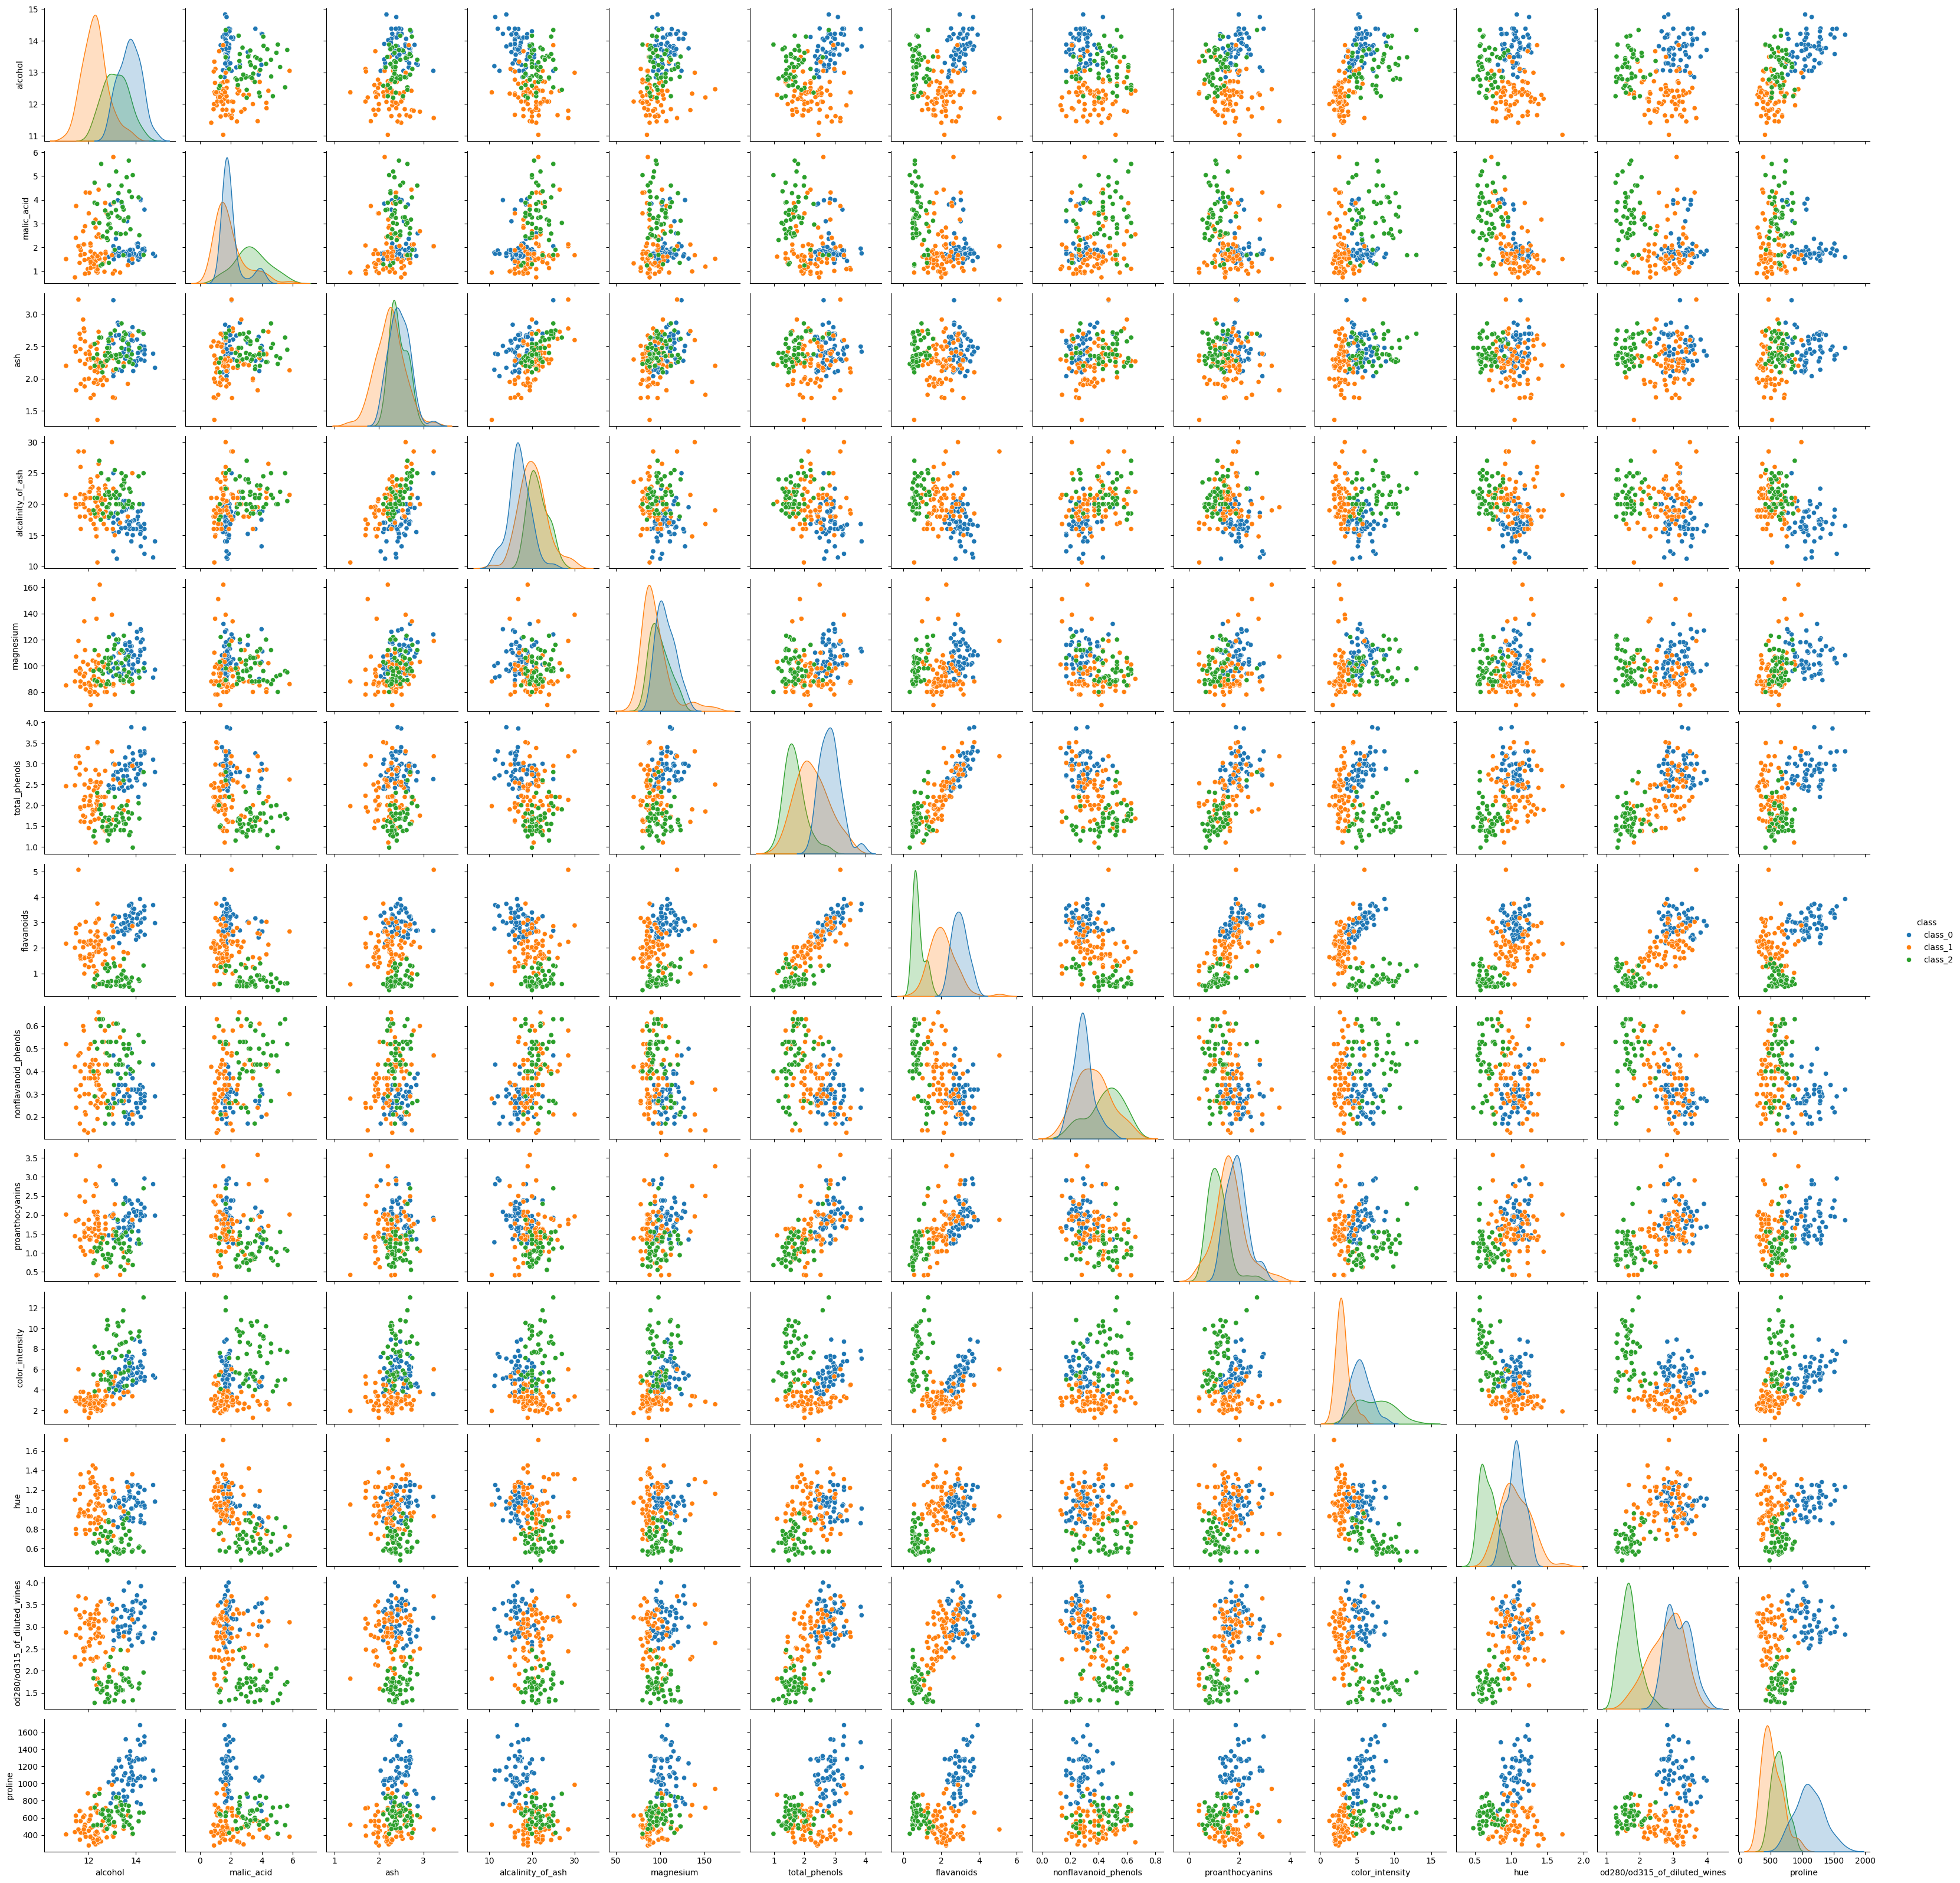

In [ ]:
fig = sns.pairplot(data, hue="class")

## Question 3: Basic data analysis [20 pts]

#### Question 3a: Counting and simple statistics [5]

1. Calculate and print the min, max, and mean values of each of the four features in the entire dataset [1]

1. Count and print the number of samples that belong to each of the three categories [1]

1. Calculate and print the mean of each feature for each label as a $3\times 13$ table [3]

*Note: For **mean** values, keep 1 digit after the decimal point when printing*

In [ ]:
# Get feature and category names from the dataset
features = wine.feature_names
categories = wine.target_names
print("Feature Name:", features)
print("Category Name:", categories)

print("1. Min, max, and mean values of all features:\n")
for feature in features:
    mean_val = np.mean(data[feature])
    min_val = np.min(data[feature])
    max_val = np.max(data[feature])
    print(f"(min, max, mean) of {feature}: ({min_val:.1f}, {max_val:.1f}, {mean_val:.1f})")

print("\n2. Number of samples per category:\n")
for category in categories:
    count = (data['class'] == category).sum()
    print(f"Number of samples in {category}: {count}")

print("\n3. Table of mean value of each feature for each label:\n")
pd.set_option("display.precision", 1)
table = data.groupby('class').mean()
panda_table = pd.DataFrame(data = table, index = categories, columns = features)
print(panda_table)

Feature Name: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Category Name: ['class_0' 'class_1' 'class_2']
1. Min, max, and mean values of all features:

(min, max, mean) of alcohol: (11.0, 14.8, 13.0)
(min, max, mean) of malic_acid: (0.7, 5.8, 2.3)
(min, max, mean) of ash: (1.4, 3.2, 2.4)
(min, max, mean) of alcalinity_of_ash: (10.6, 30.0, 19.5)
(min, max, mean) of magnesium: (70.0, 162.0, 99.7)
(min, max, mean) of total_phenols: (1.0, 3.9, 2.3)
(min, max, mean) of flavanoids: (0.3, 5.1, 2.0)
(min, max, mean) of nonflavanoid_phenols: (0.1, 0.7, 0.4)
(min, max, mean) of proanthocyanins: (0.4, 3.6, 1.6)
(min, max, mean) of color_intensity: (1.3, 13.0, 5.1)
(min, max, mean) of hue: (0.5, 1.7, 1.0)
(min, max, mean) of od280/od315_of_diluted_wines: (1.3, 4.0, 2.6)
(min, max, mean) of proline: (278.0, 1680.0, 746.9)

2. Number of

#### Question 3b: Implement the $\ell_p$ distance function [5]
1. Write code that implements the $\ell_p$ distance function between two data points as we saw it in class [3]


$\ell_p$ distance between two vectors $\mathbf{x}_i, \mathbf{x}_j$ in $\mathbb{R}^d$ can be written as  
$$\|\mathbf{x}_i - \mathbf{x}_j\|_p = \left(\sum_{k=1}^d |\mathbf{x}_i(k) - \mathbf{x}_j(k)|^p\right)^{1/p}. $$
You should implement this function yourself. Do not use any built-in function to compute distance or norm.

2. Verify that it is correct by comparing it for p=1 and p=2 against an existing implementation in Numpy for the two selected data points below. Note that the difference of the distances may not be exactly 0 due to numerical precision issues. [2]

In [ ]:
# TODO: complete the function below
def distance(x,y,p=2):
    """calculates Lp distance between point x and point y
    Args:
        x (np.ndarray): datapoint x
        y (np.ndarray): datapoint y
        p (int): order of Lp norm
    """
    lp_xy =sum((abs(xk-yk))**p for xk, yk in zip(x, y))**(1/p)
    return lp_xy

x = X_wine[0]
y = X_wine[4]

p = 1
dist = distance(x, y, p)
print(f"my l_{p} distance: {dist}")
p = 2
dist = distance(x, y, p)
print(f"my l_{p} distance: {dist}")

p = 1
dist_np = np.linalg.norm(x - y, ord=p)
print(f"numpy l_{p} distance: {dist_np}")
p = 2
dist_np = np.linalg.norm(x - y, ord=p)
print(f"numpy l_{p} distance: {dist_np}")

my l_1 distance: 349.97
my l_2 distance: 330.174500075339
numpy l_1 distance: 349.97
numpy l_2 distance: 330.174500075339


#### Question 3c: Compute the distance matrix between all data points [10]
1. Compute an $N\times N$ distance matrix between all data points (where $N=178$ is the number of data points). Use the distance function you defined in the previous cell. [3]
2. Plot the above matrix and include a colorbar. [3]


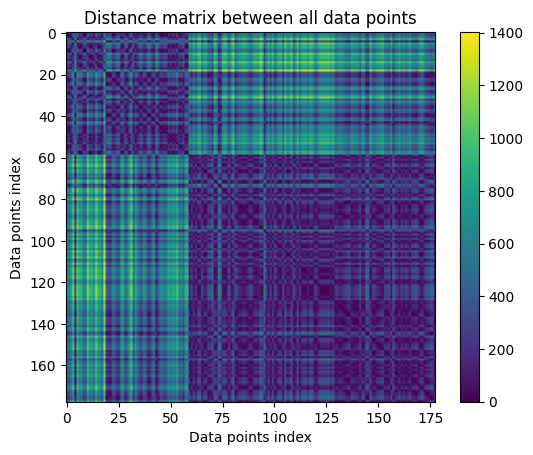

In [ ]:
N = X_wine.shape[0]
dist_matrix = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        dist_matrix[i, j] = distance(X_wine[i], X_wine[j], p=2)

# Plot the distance matrix
plt.imshow(dist_matrix, cmap='viridis')
plt.colorbar()
plt.title("Distance matrix between all data points")
plt.xlabel("Data points index")
plt.ylabel("Data points index")
plt.show()

3. What is the minimum number of distance computations that you can do in order to populate every value of this matrix? (note: it is OK if in the first two questions you do all the $N^2$ computations) [2]

- <font color='green'> **Answer:** </font> To efficiently populate the matrix, we don't have to compute all the distances. The distance from xi to xj is equal to xj to xi since we always take the absolute value of the difference between two data points. In addition, we don't need to calculate the distance from one data point to itself, since we know that it will always be zero. So, we need to calculate N*(N-1)/2 distances. N-1 showcasing that the second data point shouldn't be itself to prevent computing the distance of one data point to itself, and instead we'll put 0 for their distances, while the division by two showcasing that there is no difference between calculating the differencce between xj to xi or xi to xj, so when we calculate one we can also use it for the other by swapping the index points.

4. Do you see any pattern in the distance matrix? Why? [2]

- <font color='green'> **Answer:** </font> There's an x=y line that shows that the distance between one data point with itself is 0. We can see that the data points from 60 onwards are very close to other data points from 60 onwards, as they're quite darker and form square of close data points. The same is true for the first 60 datapoints, which are closer to other first 60 data points. However, data points with an index smaller than 60 are quite far away from data points with an indext larger than 60, as we can see from the relative brighter rectangles in the colorbar.

## Question 4: Probability [10 pts]

#### Question 4a: Prior probabilities [3 pts]

The prior probability of a class is its proportion in the dataset. Calculate the prior probability for each of the three wine classes. The probability should be a value between 0 and 1.

$$P(class)= \frac{Number~of~samples~of~that~class}{Total~number~of~samples}$$



In [ ]:
# TODO: Complete the code block below
total_samples = X_wine.shape[0]

class_0_count = (data['class'] == "class_0").sum()
class_1_count = (data['class'] == "class_1").sum()
class_2_count = (data['class'] == "class_2").sum()

p_class_0 = class_0_count/total_samples
p_class_1 = class_1_count/total_samples
p_class_2 = class_2_count/total_samples

print(f"P(class_0): {p_class_0:.4f}")
print(f"P(class_1): {p_class_1:.4f}")
print(f"P(class_2): {p_class_2:.4f}")

P(class_0): 0.3315
P(class_1): 0.3989
P(class_2): 0.2697


#### Question 4b: Conditional probability [3 pts]

Conditional probability is the probability of an event occurring given that another event has already occurred.

The conditional probability of event $A$ given event $B$ is denoted as $P(A|B)$ and is calculated with the following formula:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$


Where:
- $P(A|B)$ is the probability of event $A$ occurring given that event $B$ has occurred.
- $P(A\cap B)$ is the joint probability of both event $A$ and event $B$ occurring together.
- $P(B)$ is the probability of event $B$ occurring.


Calculate the conditional probability that a wine has `high_alcohol` given that it is a `class_0` wine.
<!--
$$P(alcohol=``high (>13.5)"|class=``class_0")= \frac{Number~of~class_0~wine~with~high~alcohol}{Total~number~of~class_0~wine} \\
= \frac{P(island=``Biscoe" \cap~species=``Gentoo")}{P(species=``Gentoo")}$$ -->



In [ ]:
# TODO: Complete the code block below

# Create the 'high_alcohol' feature
data['high_alcohol'] = data['alcohol'] > 13.5

# Filter data for class_0 wines
class_0_wines = data[data['class'] == 'class_0']

# Find how many of the class_0 wines have high alcohol
class_0_high_alcohol_count = class_0_wines['high_alcohol'].sum()

# Total number of class_0 wines
total_class_0_count =  class_0_wines.shape[0]

# Calculate the conditional probability
p_high_alcohol_given_class_0 = class_0_high_alcohol_count / total_class_0_count

print(f"P(high_alcohol | class='class_0'): {p_high_alcohol_given_class_0:.4f}")

P(high_alcohol | class='class_0'): 0.6949


#### Question 4c: Independence [4 pts]

Two events $A$ and $B$ are independent if $P(A∩B)=P(A)P(B)$.

Using the data, determine if the events `class is class_1` and `high_alcohol is True` are independent.

Explain your conclusion.

In [ ]:
# TODO: Complete the code blocks below and add your explanation.


# 1. Calculate the joint probability P(class_1 and high_alcohol)
class_1_and_high_alcohol_count = data[(data['class'] == 'class_1') & (data['high_alcohol'])].shape[0]
p_class_1_and_high_alcohol = class_1_and_high_alcohol_count / total_samples
print(f"P(class_1 and high_alcohol): {p_class_1_and_high_alcohol:.4f}")

# 2. Calculate the marginal probability P(high_alcohol)
high_alcohol_count = data[data['high_alcohol']].shape[0]
p_high_alcohol = high_alcohol_count / total_samples
print(f"P(high_alcohol): {p_high_alcohol:.4f}")

# 3. Check for independence using P(class_1) from Q4a
p_class_1 = class_1_count/total_samples
p_class_1_times_p_high_alcohol = p_class_1 * p_high_alcohol
print(f"P(class_1) * P(high_alcohol): {p_class_1_times_p_high_alcohol:.4f}")

P(class_1 and high_alcohol): 0.0112
P(high_alcohol): 0.3090
P(class_1) * P(high_alcohol): 0.1232


**Explanation:**

<font color='green'> Write your explanation here on whether the events are independent and why, based on your calculations.</font>

Two events are independent, if by multiplying their probabilities, it'd be the same as their joint probability. As the joint probability is one tenth of the mulitiplication, they are not independent from eachother and are dependent on one another.

## Question 5: K-Nearest Neighbors Classifier [45 pts]
The K-Nearest Neighbors Classifier is one of the most popular instance-based (and in general) classification models. In this question, we will implement our own version and test in different scenarios.

#### Question 5a: Implement the K-NN Classifier [10]
For the implementation, your function should have the format:
```python
def knnclassify(test_data,training_data, training_labels, K=1):
```
where `test_data` contains test data points, `training_data` contains training data points, `training_labels` holds the training labels, and `K` is the number of neighbors.

The output of this function should be `pred_labels` which contains the predicted label for each test data point (it should, therefore, have the same number of rows as `test_data`).


In [ ]:
# Prepare datasets, convert to numpy array, X data values, Y labels
X = data.loc[:, features].values
all_labels = data['class'].values

# Convert string labels to integer labels (0, 1, 2)
# This was already done when loading the data (y_wine), so we can reuse it.
Y = y_wine

In [ ]:
# TODO: complete the function below

def knnclassify(test_data, training_data, training_labels, K=1):
  """KNN classifier
    Args:
      test_data (numpy.ndarray): Test data points.
      training_data (numpy.ndarray): Training data points.
      training_labels (numpy.ndarray): Training labels.
      K (int): The number of neighbors.
    Returns:
      pred_labels: contains the predicted label for each test data point, have the same number of rows as 'test_data'
  """
  num_test = test_data.shape[0]
  pred_labels = np.zeros(num_test, dtype=training_labels.dtype)

  for i in range(num_test):
      test_point = test_data[i, :]
      distances = np.array([distance(test_point, train_point) for train_point in training_data])
      k_indices = np.argsort(distances)[:K]
      k_nearest_labels = training_labels[k_indices]

      counts = np.bincount(k_nearest_labels)
      max_count = np.max(counts)
      tied_labels = np.where(counts == max_count)[0]
      majority_label = np.random.choice(tied_labels)
      pred_labels[i] = majority_label

  return pred_labels

#### Question 5b: Measuring performance [15]

In this question you will have to evaluate the average performance of your classifier for different values of $K$. In particular, $K$ will range in $\{1,\cdots,10\}$. We are going to measure the performance using classification accuracy. For computing the accuracy, you may use
```python
accuracy = sum(test_labels == pred_labels)/len(test_labels)
```
where `test_labels` are the actual class labels and `pred_labels` are the predicted labels


In order to get a proper estimate for the accuracy for every K, we need to run multiple iterations where for each iteration we get a different randomized split of our data into train and test. In this question, we are going to run 100 iterations for every K, and for every random splitting, you may use:

```python
(training_data, test_data, training_labels, test_labels) = train_test_split(X, Y, test_size=0.3)
```
where the train/test ratio is 70/30.

After computing the accuracy for every $K$ for every iteration, you will have 100 accuracies per $K$. The best way to store those accuracies is in a matrix that has as many rows as values for $K$ and 100 columns, each one for each iteration.

Compute average accuracy as a function of $K$. Because we have a randomized process, we also need to compute how certain/uncertain our estimation for the accuracy per $K$ is. For that reason, we also need to compute the standard deviation of the accuracy for every $K$. Having computed both average accuracy and standard deviation, make a figure that shows the average accuracy as a function of $K$ with each point of the figure being surrounded by an error-bar encoding the standard deviation. You may find
```python
plt.errorbar()
```
useful for this plot.

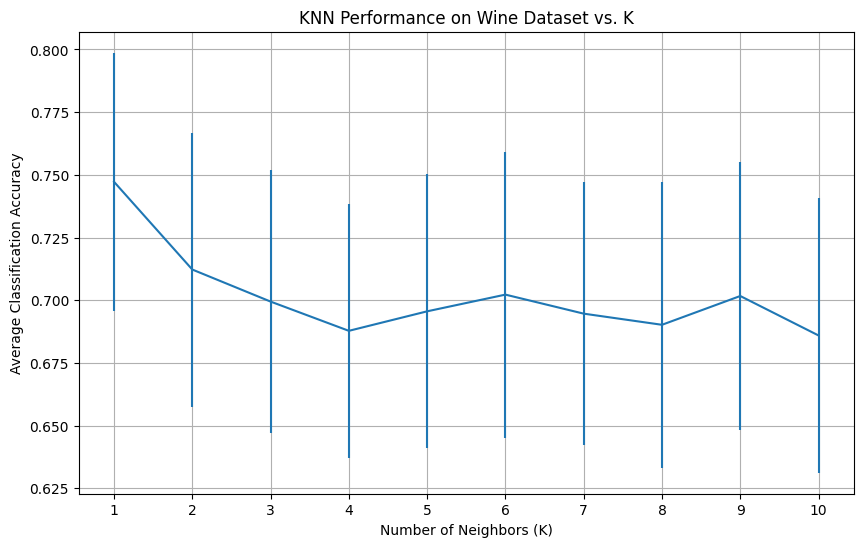

Best performance is for K = 1 with an accuracy of 0.747


In [ ]:
# TODO: write your code here
# You should be able to get above 80% accuracies

num_iterations = 100
k_values = range(1, 11)
accuracies = np.zeros((len(k_values), num_iterations))

for i, K in enumerate(k_values):
    for j in range(num_iterations):
      training_data, test_data, training_labels, test_labels = train_test_split(X, Y, test_size=0.3)
      pred_labels = knnclassify(test_data, training_data, training_labels, K)
      accuracy = sum(test_labels == pred_labels)/len(test_labels)
      accuracies[i][j] = accuracy

# Calculate average accuracy and standard deviation for each K
avg_accuracies = np.mean(accuracies, axis=1)
std_accuracies = np.std(accuracies, axis=1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(k_values, avg_accuracies, yerr=std_accuracies)
plt.title('KNN Performance on Wine Dataset vs. K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Average Classification Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Print best K
best_k_index = np.argmax(avg_accuracies)
print(f"Best performance is for K = {k_values[best_k_index]} with an accuracy of {avg_accuracies[best_k_index]:.3f}")

### Question 5c: Effect of data normalization [10]

You will notice that if you compute distances using the raw data, the KNN accuracy will be in 68-76% range.

You can improve the accuracy of the KNN algorithm to above 95% by performing data normalization as the pre-processing step where you can first convert every feature value to the range [0,1] and then perform KNN algorithm.

You can read more about such normalization procedures [here](https://en.wikipedia.org/wiki/Feature_scaling).

1. First normalize the feature values to [0, 1]. Then run KNN similar to question 5b for K = {1, ..., 10} and 100 iterations for every K. Plot the performance with errorbar. [8]


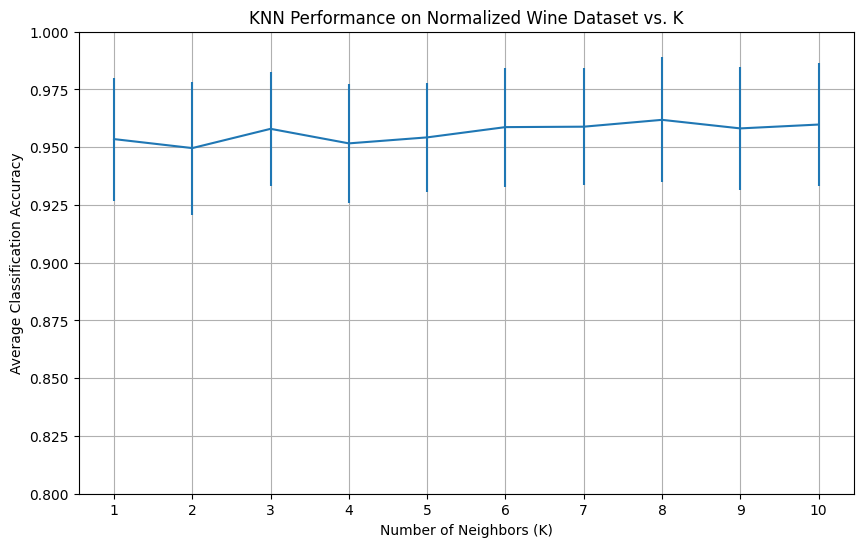

Best performance with normalized data is for K = 8 with an accuracy of 0.962


In [ ]:
# TODO: Write your code here
# 1. Normalize the feature values to [0, 1]
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_norm = (X - X_min) / (X_max - X_min)

# Repeat the experiment with normalized data
accuracies_norm = np.zeros((len(k_values), num_iterations))

for i, K in enumerate(k_values):
    for j in range(num_iterations):
      training_data, test_data, training_labels, test_labels = train_test_split(X_norm, Y, test_size=0.3)
      pred_labels = knnclassify(test_data, training_data, training_labels, K)
      accuracy = sum(test_labels == pred_labels)/len(test_labels)
      accuracies_norm[i][j] = accuracy

# Calculate average accuracy and standard deviation for each K
avg_accuracies_norm = np.mean(accuracies_norm, axis=1)
std_accuracies_norm = np.std(accuracies_norm, axis=1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(k_values, avg_accuracies_norm, yerr=std_accuracies_norm)
plt.title('KNN Performance on Normalized Wine Dataset vs. K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Average Classification Accuracy')
plt.xticks(k_values)
plt.ylim(0.8, 1.0) # Adjust y-axis to see the high accuracy better
plt.grid(True)
plt.show()

# Print best K
best_k_index_norm = np.argmax(avg_accuracies_norm)
print(f"Best performance with normalized data is for K = {k_values[best_k_index_norm]} with an accuracy of {avg_accuracies_norm[best_k_index_norm]:.3f}")

2. Why does the performance increase when we do feature normalization? [2]
- <font color='green'> **Answer:** </font> One of the reasons is that when our data is not normalized, features with larger magnitude differences dominate when we're calculating distance to various neighbors. For example, the max difference for proline is around 1400, while for hue it's 1.2. When we calculate distances, a difference of 14 in proiline can easily dominate a 1.2 difference in hue, even though the difference in proline should be much less influential than if two data points are on the polar opposide sides on hue. By normalizing it, we make sure that all features contribute equally, and that distances from one data point to another in a feature are based on its relative and not absolute difference. So a differnece of 10 in proline will be a relative difference of 0.01 in our rescaling, while a 1.2 difference in hue would be a relative difference of 1, thus making sure that hue is more influential than proline in our calculations. We now know that absolute differences matters less than relative as confirmed by our accurave massively improving regardless of the number of neighbors we have compared to the raw data.

### Question 5d: Feature Selection [10]

For the following questions, you should perform KNN classification using only 2 features from `['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']` per sample.

*You may want to refer to pairplot above to decide which features are best*

**Answer the following questions**

1. Which two features did you choose to get the **best** performance for KNN algorithm?
1. Which two features did you choose to get the **worst** performance for KNN algorithm?
2. Why? (Justify your answer)


**Write your answer here:**

1. proline and od280/od315_of_diluted_wines

2. ash and magnesium

3. For feature selection, the best features are ones that create clusters with little overlap, low intraclass distance and high interclass distance. Essentially, the best two features are ones that create tight clusters of the same class, seperated and distant from other clusters of other classes. Thus, k-nearest neighbors of any point will most likely belong to the same class, leading to correct predictions. For the worst features, you need to have your data points spread apart and with lots of overlap with other classes. Basically, two features which make it impossible to create clear clusters, and the overlap makes classification errors much higher, meaning that the nearest neighbors of a point could easily belong to different classes, causing misclassification errors. Of course the two features picked for both answers are not ideal, for the best two features the ornage class does overlap with the green and blue ones as it is more spread out than we'd like, and for the two worst ones, you can perhaps predict ornage classes well as in the sparser outer areas of the plot have a few orange data points in them. Still, the best ones have discrete tight clusters that make predictions easier, and the worst ones are an overlapping nightmare.

---

## <font color='red'> **Submission instructions** </font>
1. Follow these steps to download this Colab notebook and convert it to PDF. You can follow similar steps as [here](https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab) but convert to PDF (not HTML).
 - Download your notebook as `.ipynb` file. You can do it using only Google Colab. `File` -> `Download` -> `Download .ipynb`.
 - Reupload it so Colab can see it. Click on the `Files` icon on the far left to expand the side bar. You can directly drag the downloaded `.ipynb` file to the area. Or click `Upload to session storage` icon and then select & upload your `.ipynb` file.
 - Use the following commands to convert it to PDF.
 ```
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic pandoc
!pip install pypandoc
!jupyter nbconvert --log-level CRITICAL --to pdf /path/to/Fall2025_HW1.ipynb
  ```
 - Your PDF file is ready. Click 3 dots and `Download`.

<font color='red'> **Note: Please follow these instructions to generate the PDF. DO NOT use any other method, such as `ctrl+p`.** </font>

2. Upload the PDF to Gradescope and **select** the correct pages for each question. Refer to the shared video or contact the TAs if you face any issues. **Important!**


3. Upload the `.ipynb` file to Gradescope. Make sure that both the **code** and the **PDF** are uploaded. **Important!**


Notice: In case of errors in conversion, please check your LaTeX and debug. In Markdown, when you write in LaTeX math mode, do not leave any leading and trailing whitespaces inside the dollar signs ($). For example, write `(dollarSign)\mathbf(dollarSign)(dollarSign)` instead of `(dollarSign)(space)\mathbf{w}(dollarSign)`. Otherwise, nbconvert will throw an error and the generated pdf will be incomplete.

In [ ]:
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic pandoc
!pip install pypandoc

Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,065 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,323 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [12

In [ ]:
!jupyter nbconvert --log-level INFO --to pdf /content/Fall2025_HW1.ipynb # make sure the ipynb name is correct

[NbConvertApp] Converting notebook /content/Fall2025_HW1.ipynb to pdf
[NbConvertApp] Support files will be in Fall2025_HW1_files/
[NbConvertApp] Making directory ./Fall2025_HW1_files
[NbConvertApp] Writing 118877 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 3516193 bytes to /content/Fall2025_HW1.pdf
